<a href="https://colab.research.google.com/github/YoussefDiaa1/Project-ITI/blob/main/Arabic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import nltk
from nltk.stem.isri import ISRIStemmer

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Arabic Sentiment Analysis.xlsx - Sheet1.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,review_description,rating
0,شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...,-1
1,خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...,1
2,تطبيق غبي و جاري حذفه ، عاملين اكواد خصم و لما...,-1
3,فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...,1
4,سيء جدا ، اسعار رسوم التوصيل لا تمت للواقع ب ص...,-1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32036 entries, 0 to 32035
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  32036 non-null  object
 1   rating              32036 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.7+ KB


,rating
count,32036.000000
mean,0.245006
std,0.944965
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
df = df.dropna(subset=["review_description", "rating"]).reset_index(drop=True)

In [6]:
print(df['rating'].value_counts())

rating
 1    19189
-1    11340
 0     1507
Name: count, dtype: int64


In [7]:
df["label"] = df["rating"].apply(lambda x: 0 if x == -1 else 1)

In [8]:
print(df['label'].value_counts())

label
1    20696
0    11340
Name: count, dtype: int64


In [9]:
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
AR_STOPWORDS = set("""
في من على الى إلى عن ما ماذا لماذا متى أين كيف هنا هناك كل بين كان كانت يكون لقد قد هل بل لا لم لن إن أن إنه أنه هذه هذا هؤلاء تلك ذلك ثم لكن أو أما أي أيضا فقط حتى اذا إذ به بها مع ضد كما لأن أجل إلا أمام أمس أنت أنا نحن هو هي هم هن انت انتم انتن هما كذلك سوف التي الذي اللذان الذين اللواتي اللاتي اللائي اللتان اللتين إياك إياكم إياكن إياكما إياهم إياه إياها إياهن إيانا و يا جدا فقط دون خلال بعد قبل عند حيث لو اذا إذا بحيث كما لدى دون نفس تحت فوق بين دون الى
""".split())

EN_STOP = {"the","and","or","is","are","a","an","to","of","for","in","on","at","it","this","that","with","as","by","be","was","were","has","have","had","i","you","we","they"}


In [11]:
stemmer = ISRIStemmer()

def normalize_clean(text: str):
    if not isinstance(text, str):
       text = str(text)

    # 1) lowercase (للانجلش )
    text = text.lower()

    # remove html
    text = re.sub(r"<[^>]+>", " ", text)

    # remove تشكيل
    text = re.sub(r"[\u0617-\u061A\u064B-\u0652]", "", text)

    # normalize letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)

    # remove non-letters
    text = re.sub(r"[^ء-يA-Za-z\s]", " ", text)

    # إزالة أي حروف مش عربية أو إنجليزي/أرقام
    text = re.sub(r'[^\w\s]', '', text)

    # remove repeated letters
    text = re.sub(r"(.)\1{2,}", r"\1", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [12]:
def preprocess_text(text: str):
    text = normalize_clean(text)
    tokens = text.split()
    #use both arabic and english stop words
    tokens = [word for word in tokens if word not in arabic_stopwords and word not in english_stopwords]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)



In [13]:
df['cleaned_review_description'] = df['review_description'].apply(preprocess_text)
display(df.head())

,review_description,rating,label,cleaned_review_description
0,شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...,-1,0,شرك زبل سوق رشم فيش حتي رقم شكو سوق يسب يمش مي...
1,خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...,1,1,خدم دفع طرق الك نت وقف عند اصبح فقط دفع نقد
2,تطبيق غبي و جاري حذفه ، عاملين اكواد خصم و لما...,-1,0,طبق غبي جري حذف عمل كود خصم خدم كتر مره عملو ب...
3,فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...,1,1,فعل طبق متز مكن يتح خدم طبق ان تطع غير كلم لسر...
4,سيء جدا ، اسعار رسوم التوصيل لا تمت للواقع ب ص...,-1,0,سيء جدا سعر رسم وصل تمت وقع صله


/tmp/ipython-input-2646835905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="Set2")


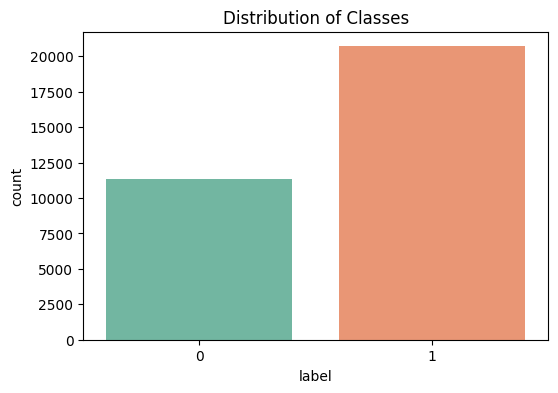

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label", palette="Set2")
plt.title("Distribution of Classes")
plt.show()


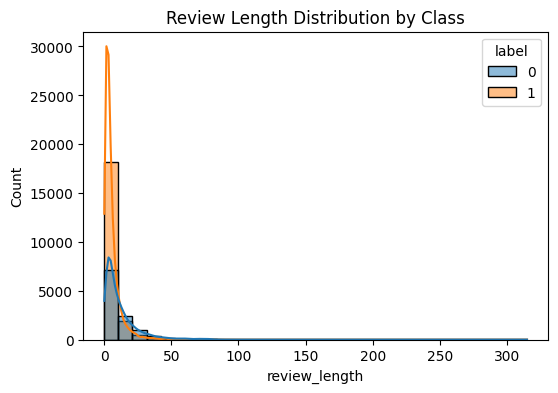

In [19]:
#  عدد كلمات
df["review_length"] = df["cleaned_review_description"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
sns.histplot(df, x="review_length", hue="label", bins=30, kde=True)
plt.title("Review Length Distribution by Class")
plt.show()

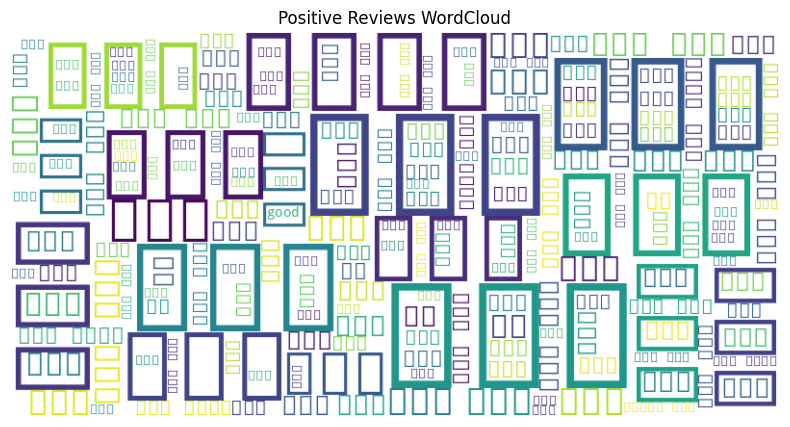

In [21]:
# Positive WordCloud
positive_text = " ".join(df[df["label"]==1]["cleaned_review_description"])
wc_pos = WordCloud(width=800, height=400, background_color="white", stopwords=AR_STOPWORDS).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

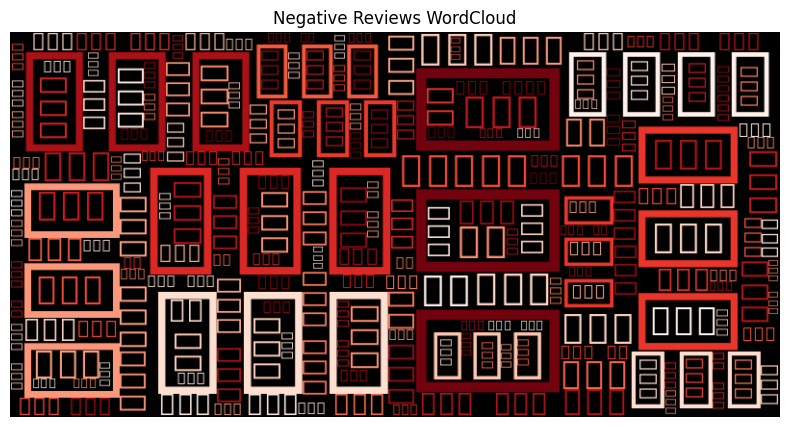

In [23]:
# Negative WordCloud
negative_text = " ".join(df[df["label"]==0]["cleaned_review_description"])
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds", stopwords=AR_STOPWORDS).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()

/tmp/ipython-input-1231541258.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


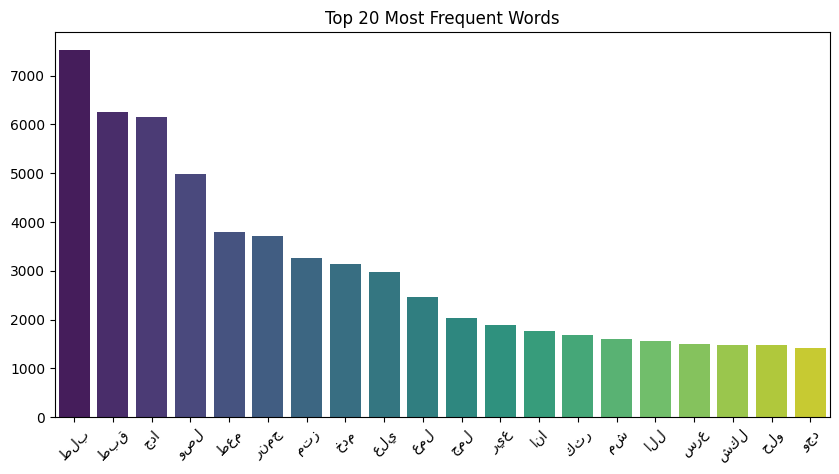

In [25]:
from collections import Counter

# Split words
all_words = ' '.join(df['cleaned_review_description']).split()
word_freq = Counter(all_words)

# Top 20 words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
X = df["cleaned_review_description"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)